IMPORTING NECESSARY LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

IMPORTING THE DATASET

In [2]:
df=pd.read_excel("cytotoxins.xlsx")
df.head(10)

,chid,casn,chnm,dsstox_substance_id,cytotox_median_raw,cytotox_mad,global_mad,cytotox_median_log,cytotox_median_um,cytotox_lower_bound_um,ntested,nhit,cytotox_lower_bound_log,created_date
0,20005,60-35-5,Acetamide,DTXSID7020005,1.959910,0.000000,0.1752,3.000000,1000.000000,1000.000000,87,1,3.000000,2025-06-02 17:20:04
1,20006,103-90-2,Acetaminophen,DTXSID2020006,NaN,NaN,0.1752,3.000000,1000.000000,1000.000000,87,0,3.000000,2025-06-02 17:20:04
2,20022,50594-66-6,Acifluorfen,DTXSID0020022,1.787059,0.130601,0.1752,3.000000,1000.000000,1000.000000,87,2,3.000000,2025-06-02 17:20:04
3,20027,79-06-1,Acrylamide,DTXSID5020027,NaN,NaN,0.1752,3.000000,1000.000000,1000.000000,87,0,3.000000,2025-06-02 17:20:04
4,20040,309-00-2,Aldrin,DTXSID8020040,1.663301,0.203926,0.1752,1.663301,46.057597,13.730951,87,62,1.137701,2025-06-02 17:20:04
5,20068,117-79-3,2-Aminoanthraquinone,DTXSID6020068,1.261391,0.302220,0.1752,1.261391,18.255368,5.442393,87,7,0.735790,2025-06-02 17:20:04
6,20069,97-56-3,o-Aminoazotoluene,DTXSID1020069,1.534878,0.242569,0.1752,1.534878,34.267140,10.215913,87,62,1.009277,2025-06-02 17:20:04
7,20087,4180-23-8,(E)-Anethole,DTXSID9020087,NaN,NaN,0.1752,3.000000,1000.000000,1000.000000,87,0,3.000000,2025-06-02 17:20:04
8,20089,101-05-3,Anilazine,DTXSID9020089,1.472699,0.041364,0.1752,3.000000,1000.000000,1000.000000,87,2,3.000000,2025-06-02 17:20:04
9,20105,134-03-2,Sodium L-ascorbate,DTXSID0020105,1.201472,0.000000,0.1752,3.000000,1000.000000,1000.000000,87,1,3.000000,2025-06-02 17:20:04


From my understanding chid and casn and dsstox are representing some unique id of the chemicals used,global_mad and cytotox_mad represent the median average data and cytotoxin_median_um and cytotoxin_log_median um represent the values in micrometer to measure toxicity and the last column is for reference to the date created

DROPPING UNNECESSARY COLUMNS(LIKE ID,DATE ETC)

In [3]:
#now we need to pick up useful columns in this dataset
#names,ids and dates are of no use only values are useful
df=df.drop(["chid","casn","dsstox_substance_id","created_date"],axis=1)
df

,chnm,cytotox_median_raw,cytotox_mad,global_mad,cytotox_median_log,cytotox_median_um,cytotox_lower_bound_um,ntested,nhit,cytotox_lower_bound_log
0,Acetamide,1.959910,0.000000,0.1752,3.000000,1000.000000,1000.000000,87,1,3.000000
1,Acetaminophen,NaN,NaN,0.1752,3.000000,1000.000000,1000.000000,87,0,3.000000
2,Acifluorfen,1.787059,0.130601,0.1752,3.000000,1000.000000,1000.000000,87,2,3.000000
3,Acrylamide,NaN,NaN,0.1752,3.000000,1000.000000,1000.000000,87,0,3.000000
4,Aldrin,1.663301,0.203926,0.1752,1.663301,46.057597,13.730951,87,62,1.137701
...,...,...,...,...,...,...,...,...,...,...
10482,"2,7-Naphthalenedisulfonic acid, 4-hydroxy-, di...",NaN,NaN,0.1752,3.000000,1000.000000,1000.000000,0,0,3.000000
10483,Bone morphogenetic protein 2 (human),NaN,NaN,0.1752,3.000000,1000.000000,1000.000000,0,0,3.000000
10484,Bone morphogenetic protein 7 (human),NaN,NaN,0.1752,3.000000,1000.000000,1000.000000,0,0,3.000000
10485,"4,6-Bis(morpholin-4-yl)-N-(4-nitrophenyl)-1,3,...",NaN,NaN,0.1752,3.000000,1000.000000,1000.000000,0,0,3.000000


In [19]:
df.describe()

,cytotox_median_raw,cytotox_mad,global_mad,cytotox_median_log,cytotox_median_um,cytotox_lower_bound_um,ntested,nhit,cytotox_lower_bound_log
count,4284.000000,4284.000000,1.048700e+04,10487.000000,10487.000000,10487.000000,10487.000000,10487.000000,10487.000000
mean,1.303566,0.171101,1.752002e-01,2.536568,732.502539,726.562399,55.571565,6.124535,2.391523
std,0.760592,0.248882,1.110276e-16,0.819129,433.448825,442.943458,29.337601,14.159015,1.038716
min,-5.071851,0.000000,1.752002e-01,-4.237168,0.000058,0.000017,0.000000,0.000000,-4.762769
25%,1.246661,0.010141,1.752002e-01,1.770583,58.963441,17.578514,44.000000,0.000000,1.244982
50%,1.482163,0.117821,1.752002e-01,3.000000,1000.000000,1000.000000,70.000000,0.000000,3.000000
75%,1.659980,0.242897,1.752002e-01,3.000000,1000.000000,1000.000000,71.000000,4.000000,3.000000
max,2.782281,4.349214,1.752002e-01,3.000000,1000.000000,1000.000000,90.000000,87.000000,3.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10487 entries, 0 to 10486
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   chnm                     10487 non-null  object 
 1   cytotox_median_raw       4284 non-null   float64
 2   cytotox_mad              4284 non-null   float64
 3   global_mad               10487 non-null  float64
 4   cytotox_median_log       10487 non-null  float64
 5   cytotox_median_um        10487 non-null  float64
 6   cytotox_lower_bound_um   10487 non-null  float64
 7   ntested                  10487 non-null  int64  
 8   nhit                     10487 non-null  int64  
 9   cytotox_lower_bound_log  10487 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 819.4+ KB


CHECKING FOR MIXED AND NULL VALUES

In [4]:
#Check missing and duplicate values
df.isnull().sum()
#df.duplicated.sum()

chnm                          0
cytotox_median_raw         6203
cytotox_mad                6203
global_mad                    0
cytotox_median_log            0
cytotox_median_um             0
cytotox_lower_bound_um        0
ntested                       0
nhit                          0
cytotox_lower_bound_log       0
dtype: int64

In [5]:
df.duplicated().sum()

0

After this we can say that in a 10,000 records' dataset, only  the features cytotoxin_median_raw and cytotox_mad have null values other than that all columns have proper values and there are no duplicate values

From the summary part of the dataset, we can say that cytotoxin_raw dataset has a range of -5.071 to 2.782 which indicates the presence of negative values,so that's why in the later stages we have had to take the log values.The mean and standard deviation stands as 1.304 and 0.761 which means the data is moderately deviated.


The MAD columns has 2 effects: The global_mad has comparatively standard values of 1.752 and the cytotoxin_mad values has a mean of 0.17 ,relatively less values showing relative stability.

cytotocin_median_um and cytotoxin_lower_bound_um represents the values in micrometer metrics

Identifying all values with hits>0 that are cytotoxic

In [6]:
dfmod=df[df['nhit']>0]
dfmod

,chnm,cytotox_median_raw,cytotox_mad,global_mad,cytotox_median_log,cytotox_median_um,cytotox_lower_bound_um,ntested,nhit,cytotox_lower_bound_log
0,Acetamide,1.959910,0.000000,0.1752,3.000000,1000.000000,1000.000000,87,1,3.000000
2,Acifluorfen,1.787059,0.130601,0.1752,3.000000,1000.000000,1000.000000,87,2,3.000000
4,Aldrin,1.663301,0.203926,0.1752,1.663301,46.057597,13.730951,87,62,1.137701
5,2-Aminoanthraquinone,1.261391,0.302220,0.1752,1.261391,18.255368,5.442393,87,7,0.735790
6,o-Aminoazotoluene,1.534878,0.242569,0.1752,1.534878,34.267140,10.215913,87,62,1.009277
...,...,...,...,...,...,...,...,...,...,...
9101,Citronellyl isobutyrate,1.698970,0.000000,0.1752,3.000000,1000.000000,1000.000000,45,1,3.000000
9104,3-Chloro-7-hydroxy-4-methyl-2-benzopyrone,1.583359,0.000000,0.1752,1.583359,38.314176,11.422439,44,5,1.057759
9110,Metribuzin-DA,1.850823,0.000000,0.1752,3.000000,1000.000000,1000.000000,44,1,3.000000
9114,BisOPP-A,1.651118,0.195083,0.1752,1.651118,44.783508,13.351112,44,42,1.125517


As soon as we do that segregation we observe that all teh null values have automatically been removed and the size reduces to 4284 with no duplicate,missing values

In [7]:
dfmod.isnull().sum()

chnm                       0
cytotox_median_raw         0
cytotox_mad                0
global_mad                 0
cytotox_median_log         0
cytotox_median_um          0
cytotox_lower_bound_um     0
ntested                    0
nhit                       0
cytotox_lower_bound_log    0
dtype: int64

In [8]:
#Unique
dfmod['chnm'].nunique()

4284

HERE WE FILTER OUT THE UNIQUE CYTOTOXIC REPORTS in the modified dataset 

In [9]:
#Unique cytotoxic records:
measure=dfmod[dfmod['nhit']>0]['chnm'].nunique()
measure

4284

In [10]:
data=dfmod

In this section we identify the extreme values in the data and we can only classify 20 such records as outliers.

In [11]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
outliers

,chnm,cytotox_median_raw,cytotox_mad,global_mad,cytotox_median_log,cytotox_median_um,cytotox_lower_bound_um,ntested,nhit,cytotox_lower_bound_log
1196,Rofecoxib,-2.086186,8.145058e-09,0.1752,-2.086186,0.008200,0.002445,26,3,-2.611787
1766,Benzyl acetate,-4.003476,8.207345e-02,0.1752,-4.003476,0.000099,0.000030,73,7,-4.529077
2870,"(2R,3R,4R,5S)-6-(Methylamino)hexane-1,2,3,4,5-...",-4.008194,1.028878e-02,0.1752,-4.008194,0.000098,0.000029,70,5,-4.533795
3594,2-Nitrobenzyl chloride,-3.917475,5.552521e-02,0.1752,-3.917475,0.000121,0.000036,70,18,-4.443076
3616,Oleic acid,-3.910329,1.831919e-01,0.1752,-3.910329,0.000123,0.000037,73,9,-4.435929
3984,Dodecanedioic acid,-3.823790,2.737619e-01,0.1752,-3.823790,0.000150,0.000045,71,8,-4.349391
4019,"(2Z)-1,4-Dichlorobut-2-ene",-3.705867,3.447381e-01,0.1752,-3.705867,0.000197,0.000059,70,4,-4.231468
4898,1-Monolaurin,-3.358324,1.207909e+00,0.1752,-3.358324,0.000438,0.000131,73,10,-3.883925
4994,n-Amyl butyrate,-3.529061,4.521281e-02,0.1752,-3.529061,0.000296,0.000088,73,5,-4.054662
5176,o-Ethoxyphenol,-3.926355,1.216409e-01,0.1752,-3.926355,0.000118,0.000035,73,7,-4.451956


In [12]:
outliers.shape

(20, 10)

2. TREND ANALYSIS

Here we analyze the trends of selective key columns in the data like cytotox_median_um,cytotox_lower_bound_um and cytotox_median_log 

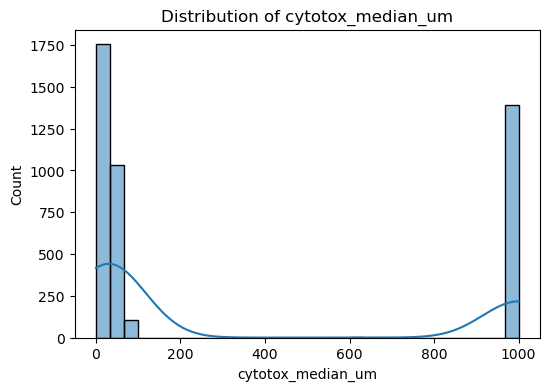

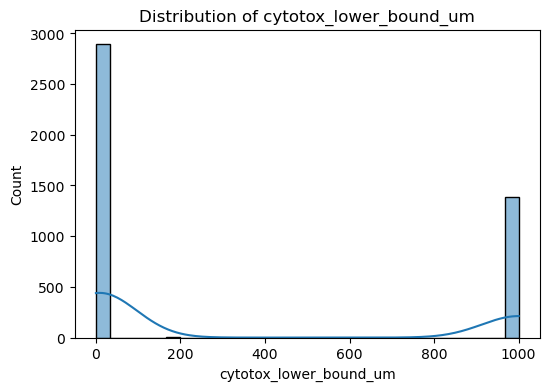

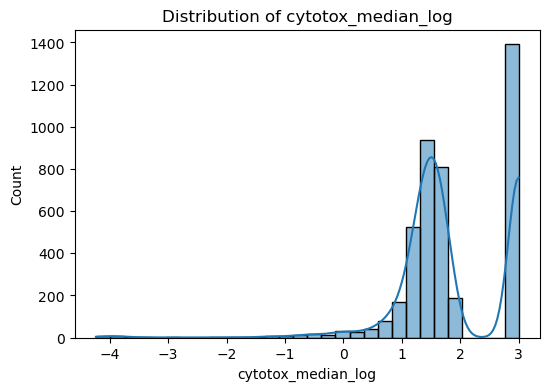

In [13]:
metrics = ['cytotox_median_um', 'cytotox_lower_bound_um', 'cytotox_median_log']
for columns in metrics:
    plt.figure(figsize=(6,4))
    sns.histplot(data[columns].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {columns}')
    plt.show()

Now we see the top and least 10 cytotoxic chemicals

In [14]:
# Top 10 most and least cytotoxic (lower µM → higher toxicity)
top10 = data.sort_values('cytotox_median_um').head(10)
least10 = data.sort_values('cytotox_median_um').tail(10)
top10


,chnm,cytotox_median_raw,cytotox_mad,global_mad,cytotox_median_log,cytotox_median_um,cytotox_lower_bound_um,ntested,nhit,cytotox_lower_bound_log
8105,Enalapril acid,-4.237168,0.106848,0.1752,-4.237168,0.000058,0.000017,70,4,-4.762769
8842,Amidoflumet,-4.227050,0.008176,0.1752,-4.227050,0.000059,0.000018,56,3,-4.752650
7065,Nelarabine,-4.139820,0.196285,0.1752,-4.139820,0.000072,0.000022,70,5,-4.665421
8445,NTP Mix59 CT1 62-GP,-4.102557,0.246047,0.1752,-4.102557,0.000079,0.000024,70,10,-4.628157
7489,Cornmint oil,-4.027258,0.288223,0.1752,-4.027258,0.000094,0.000028,73,4,-4.552859
2870,"(2R,3R,4R,5S)-6-(Methylamino)hexane-1,2,3,4,5-...",-4.008194,0.010289,0.1752,-4.008194,0.000098,0.000029,70,5,-4.533795
1766,Benzyl acetate,-4.003476,0.082073,0.1752,-4.003476,0.000099,0.000030,73,7,-4.529077
7227,2-Methoxy-4-methylphenol,-3.983378,0.041912,0.1752,-3.983378,0.000104,0.000031,71,4,-4.508979
5667,5-Phenyl-1H-tetrazole,-3.937133,0.113180,0.1752,-3.937133,0.000116,0.000034,71,7,-4.462734
5176,o-Ethoxyphenol,-3.926355,0.121641,0.1752,-3.926355,0.000118,0.000035,73,7,-4.451956


In [15]:
least10

,chnm,cytotox_median_raw,cytotox_mad,global_mad,cytotox_median_log,cytotox_median_um,cytotox_lower_bound_um,ntested,nhit,cytotox_lower_bound_log
4001,4-tert-Butylbenzaldehyde,1.579214,0.000000,0.1752,3.0,1000.0,1000.0,70,1,3.0
4000,2-(2-Aminoethoxy)ethanol,-3.769306,0.088750,0.1752,3.0,1000.0,1000.0,71,2,3.0
3986,"1,2-Cyclohexanediamine",1.887087,0.000000,0.1752,3.0,1000.0,1000.0,71,1,3.0
3982,sec-Butylurea,1.698970,0.000000,0.1752,3.0,1000.0,1000.0,71,1,3.0
3979,Tetramethyl orthosilicate,1.886472,0.000000,0.1752,3.0,1000.0,1000.0,70,1,3.0
3973,Manganese(II) acetate,0.674543,0.928466,0.1752,3.0,1000.0,1000.0,71,2,3.0
3955,Trimethylamine hydrochloride,1.828050,0.000000,0.1752,3.0,1000.0,1000.0,70,1,3.0
3918,"N-(6-Aminohexyl)hexane-1,6-diamine",0.870932,0.213177,0.1752,3.0,1000.0,1000.0,70,2,3.0
4588,5alpha-Androstan-3beta-ol,1.556220,0.000000,0.1752,3.0,1000.0,1000.0,70,1,3.0
3949,"Ethanedioic acid, calcium salt",0.540796,0.001836,0.1752,3.0,1000.0,1000.0,70,2,3.0


Now we explore the relationship between ntested,nhit and cytotoxicity_median_um with ntested and nhits on the axes and the hue as cytotoxicity_median_um

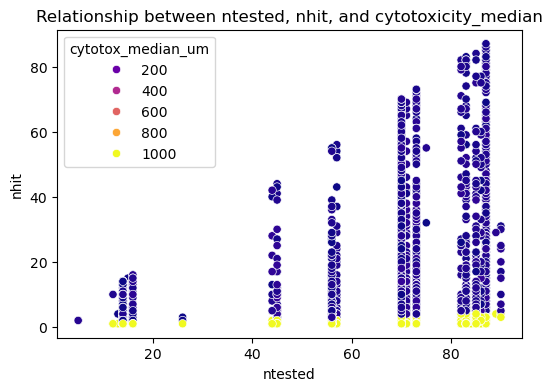

In [16]:
# Explore relationship between ntested, nhit, and cytotoxicity
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='ntested', y='nhit', hue='cytotox_median_um', palette='plasma')
plt.title('Relationship between ntested, nhit, and cytotoxicity_median')
plt.show()

Cytotoxicity_Median_Comparison(Top 10)

C:\Users\Aishik\AppData\Local\Temp\ipykernel_13024\3629698365.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y='chnm', x='cytotox_median_um', palette='Reds_r')


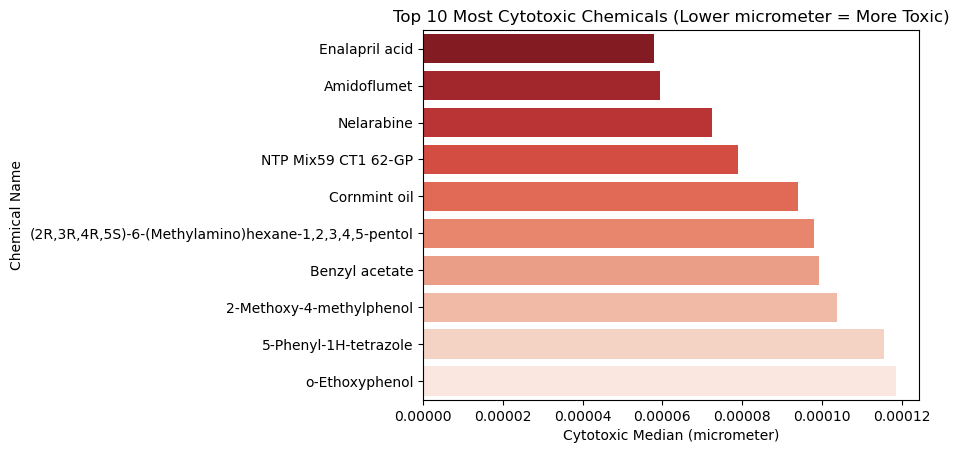

In [22]:
sns.barplot(data=top10, y='chnm', x='cytotox_median_um', palette='Reds_r')
plt.title('Top 10 Most Cytotoxic Chemicals (Lower micrometer = More Toxic)')
plt.xlabel('Cytotoxic Median (micrometer)')
plt.ylabel('Chemical Name')
plt.show()

Correlation HeatMap of key attributes

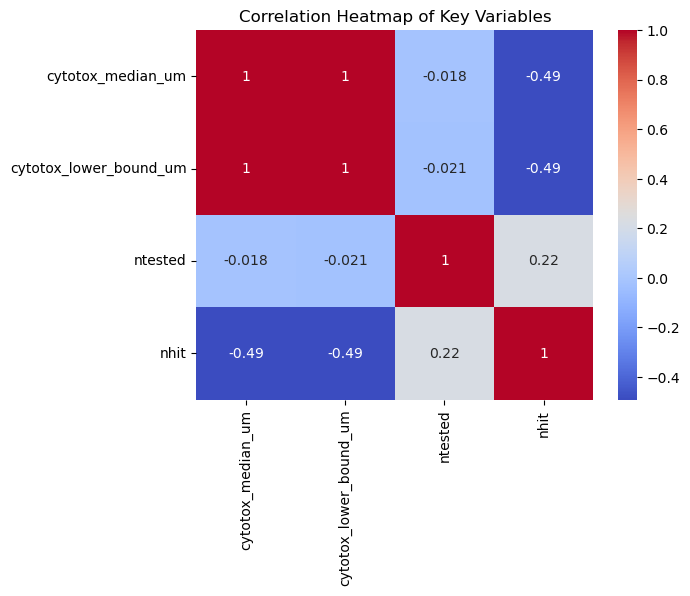

In [18]:
corr = data[['cytotox_median_um', 'cytotox_lower_bound_um', 'ntested', 'nhit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Variables')
plt.show()